# Exact General Relativistic Rotating Disks Immersed in Rotating Dust Generated from van Stockum Solutions by Vogt and Letelier
##  Geoff Cope
##  Univeristy of Utah
##  January 5th, 2022

https://arxiv.org/abs/astro-ph/0611428

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,phi,z,dt,dr,dphi,dz = symbols('t r phi z dt dr dphi dz')

In [4]:
N = Function('N')(r,z)
N

In [5]:
nu = Function('nu')(r,z)
nu

In [6]:
variables = Matrix( [t,r,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix( [dt,dr,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement = expand( (dt - N*dphi)**2 - r**2 * dphi**2 - exp(nu)*(dr**2 + dz**2) ) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡   1          0         -N(r, z)          0    ⎤
⎢                                               ⎥
⎢            ν(r, z)                            ⎥
⎢   0      -ℯ                0             0    ⎥
⎢                                               ⎥
⎢                        2    2                 ⎥
⎢-N(r, z)      0      - r  + N (r, z)      0    ⎥
⎢                                               ⎥
⎢                                        ν(r, z)⎥
⎣   0          0             0         -ℯ       ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡   1          0         -N(r, z)          0    ⎤
⎢                                               ⎥
⎢            ν(r, z)                            ⎥
⎢   0      -ℯ                0             0    ⎥
⎢                                               ⎥
⎢                        2    2                 ⎥
⎢-N(r, z)      0      - r  + N (r, z)      0    ⎥
⎢                                               ⎥
⎢                                        ν(r, z)⎥
⎣   0          0             0         -ℯ       ⎦

In [12]:
from einsteinpy.symbolic import *

In [23]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [24]:
metric = MetricTensor(m,syms)

In [25]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢⎡                                          ∂                                               
⎢⎢                                  N(r, z)⋅──(N(r, z))                                     
⎢⎢                                          ∂r                                              
⎢⎢         0                        ───────────────────                                     
⎢⎢                                             2                                            
⎢⎢                                          2⋅r                                             
⎢⎢                                                                                          
⎢⎢        ∂                                                              ∂                  
⎢⎢N(r, z)⋅──(N(r, z))                                                 

In [26]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                   ⎛             2                2⎞                       
⎢                                   ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟  -ν(r, z)             
⎢                                   ⎜⎜──(N(r, z))⎟  + ⎜──(N(r, z))⎟ ⎟⋅ℯ                     
⎢                                   ⎝⎝∂r         ⎠    ⎝∂z         ⎠ ⎠                       
⎢                                   ───────────────────────────────────────────             
⎢                                                          2                                
⎢                                                       2⋅r                                 
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [27]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                                 ⎛     ⎛  2              2         ⎞       
⎢                                                 ⎜   2 ⎜ ∂              ∂          ⎟       
⎢                                                 ⎜- r ⋅⎜───(ν(r, z)) + ───(ν(r, z))⎟ + 1.5⋅
⎢                                                 ⎜     ⎜  2              2         ⎟       
⎢                                                 ⎝     ⎝∂r             ∂z          ⎠       
⎢                                                 ──────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

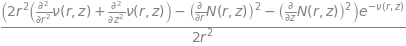

In [28]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [29]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                 ⎛     ⎛  2              2         ⎞       
⎢                                                 ⎜   2 ⎜ ∂              ∂          ⎟       
⎢                                                 ⎜- r ⋅⎜───(ν(r, z)) + ───(ν(r, z))⎟ + 1.5⋅
⎢                                                 ⎜     ⎜  2              2         ⎟       
⎢                                                 ⎝     ⎝∂r             ∂z          ⎠       
⎢                                                 ──────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [31]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                   ⎛             2                2⎞                       
⎢                                   ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟  -ν(r, z)             
⎢                                   ⎜⎜──(N(r, z))⎟  + ⎜──(N(r, z))⎟ ⎟⋅ℯ                     
⎢                                   ⎝⎝∂r         ⎠    ⎝∂z         ⎠ ⎠                       
⎢                                   ───────────────────────────────────────────             
⎢                                                          2                                
⎢                                                       2⋅r                                 
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [36]:
equation2b1 = Eq( diff(nu,z) , solve( ricciSimplified[3,1].args[2] , diff(nu,z) )[0] ) 
equation2b1

In [42]:
equation2b2 = Eq( diff(nu,r) ,expand( solve( einsteinSimplified[1,1].args[2], diff(nu,r) )[0] ) )
equation2b2 

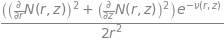

In [47]:
#  Set this equal to rho 
equation2c = ricciSimplified[0,0]
equation2c

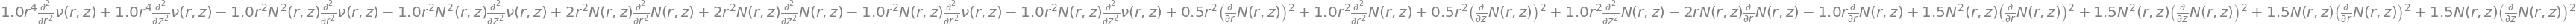

In [57]:
einsteinSimplified[2,2].args[2]  

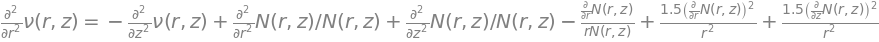

In [60]:
d2nudr2 = Eq(diff(nu,r,r), solve( einsteinSimplified[2,0].args[2], diff(nu,r,r) )[0] ) 
d2nudr2

In [82]:
dndr = Eq( diff(N,r),solve( equation2c.args[2] , diff(N,r) )[0] ) 
dndr 

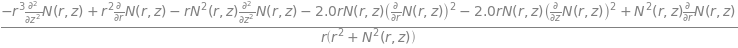

In [65]:
solve(expand( einsteinSimplified[2,2].args[2].subs(d2nudr2.args[0],d2nudr2.args[1] ) ), diff(N,r,r) )[0]

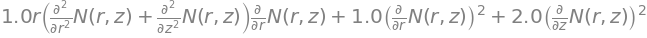

In [88]:
#  this is either not right or needs to be reduced further 
equation2a = simplify(einsteinSimplified[0,0].args[2].subs(equation2b2.args[0],equation2b2.args[1]).subs(equation2b1.args[0],equation2b1.args[1]).doit())
equation2a

In [90]:
#  First and fourth need to be fixed 
vacuumFieldEquations = Matrix([equation2a,equation2b1,equation2b2,equation2c])
vacuumFieldEquations

⎡      ⎛  2              2         ⎞                                2                    2⎤
⎢      ⎜ ∂              ∂          ⎟ ∂                 ⎛∂          ⎞        ⎛∂          ⎞ ⎥
⎢1.0⋅r⋅⎜───(N(r, z)) + ───(N(r, z))⎟⋅──(N(r, z)) + 1.0⋅⎜──(N(r, z))⎟  + 2.0⋅⎜──(N(r, z))⎟ ⎥
⎢      ⎜  2              2         ⎟ ∂r                ⎝∂r         ⎠        ⎝∂z         ⎠ ⎥
⎢      ⎝∂r             ∂z          ⎠                                                      ⎥
⎢                                                                                         ⎥
⎢                                        ∂           ∂                                    ⎥
⎢                                       -──(N(r, z))⋅──(N(r, z))                          ⎥
⎢                         ∂              ∂r          ∂z                                   ⎥
⎢                         ──(ν(r, z)) = ─────────────────────────                         ⎥
⎢                         ∂z                        r                           